In [ ]:
import  pandas as pd 
import  numpy as np
import  matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import  seaborn as sns
from sklearn.preprocessing import MaxAbsScaler
from matplotlib.ticker import MaxNLocator

##TASK - 1

In [ ]:
sd_train = pd.read_excel('sawdust_train.xlsx')
sd_train

,Primary ID,OBSNAM,w1100,w1101,w1102,w1103,w1104,w1105,w1106,w1107,w1108,w1109,w1110,w1111,w1112,w1113,w1114,w1115,w1116,w1117,w1118,w1119,w1120,w1121,w1122,w1123,w1124,w1125,w1126,w1127,w1128,w1129,w1130,w1131,w1132,w1133,w1134,w1135,w1136,w1137,...,w2264,w2265,w2266,w2267,w2268,w2269,w2270,w2271,w2272,w2273,w2274,w2275,w2276,w2277,w2278,w2279,w2280,w2281,w2282,w2283,w2284,w2285,w2286,w2287,w2288,w2289,w2290,w2291,w2292,w2293,w2294,w2295,w2296,w2297,w2298,w2299,w2300,Spruce,Pine,Birch
0,1,02a,1.83444,1.83416,1.83350,1.83237,1.83084,1.82910,1.82742,1.82611,1.82516,1.82452,1.82407,1.82372,1.82334,1.82283,1.82213,1.82134,1.82036,1.81930,1.81814,1.81696,1.81579,1.81471,1.81368,1.81269,1.81162,1.81055,1.80940,1.80812,1.80669,1.80520,1.80365,1.80204,1.80033,1.79850,1.79654,1.79447,1.79224,1.78987,...,0.474785,0.475201,0.475893,0.477067,0.478534,0.480241,0.482001,0.483780,0.485739,0.488090,0.490816,0.493888,0.496992,0.500208,0.503312,0.506305,0.509129,0.511941,0.514845,0.518192,0.521982,0.526057,0.530565,0.535400,0.540498,0.545399,0.550011,0.554586,0.559044,0.563587,0.568213,0.572867,0.577625,0.582679,0.587850,0.593058,0.598025,0.00,100.00,0.00
1,2,02b,1.82992,1.82965,1.82902,1.82800,1.82667,1.82501,1.82347,1.82225,1.82135,1.82070,1.82019,1.81970,1.81914,1.81827,1.81732,1.81630,1.81521,1.81415,1.81310,1.81212,1.81122,1.81030,1.80937,1.80840,1.80737,1.80635,1.80527,1.80412,1.80288,1.80141,1.79986,1.79817,1.79645,1.79467,1.79280,1.79087,1.78882,1.78641,...,0.473774,0.474213,0.474748,0.475621,0.476784,0.478267,0.479963,0.481736,0.483618,0.485618,0.487620,0.489659,0.491748,0.494232,0.497150,0.500430,0.503719,0.507047,0.510351,0.513900,0.517821,0.521983,0.526621,0.531626,0.536929,0.542099,0.547000,0.551910,0.556829,0.561744,0.566549,0.571178,0.575774,0.580471,0.585226,0.589929,0.594470,0.00,100.00,0.00
2,5,15a,1.84602,1.84569,1.84522,1.84431,1.84311,1.84172,1.84035,1.83918,1.83834,1.83773,1.83732,1.83694,1.83661,1.83620,1.83573,1.83525,1.83471,1.83405,1.83323,1.83232,1.83131,1.83032,1.82927,1.82825,1.82717,1.82610,1.82499,1.82369,1.82216,1.82053,1.81872,1.81676,1.81466,1.81245,1.81011,1.80754,1.80482,1.80191,...,0.455464,0.456610,0.458070,0.459900,0.461908,0.463893,0.465765,0.467519,0.469300,0.471321,0.473713,0.476485,0.479494,0.482882,0.486578,0.490449,0.494293,0.498253,0.502440,0.507076,0.511987,0.516789,0.521732,0.526741,0.531986,0.537183,0.542190,0.547198,0.552090,0.557003,0.561938,0.566829,0.571796,0.577128,0.582482,0.587653,0.592419,33.33,33.33,33.33
3,6,15b,1.84556,1.84514,1.84444,1.84340,1.84206,1.84054,1.83912,1.83795,1.83714,1.83658,1.83626,1.83604,1.83578,1.83540,1.83483,1.83414,1.83330,1.83237,1.83140,1.83043,1.82947,1.82862,1.82778,1.82696,1.82604,1.82503,1.82387,1.82256,1.82106,1.81939,1.81758,1.81561,1.81348,1.81119,1.80868,1.80613,1.80346,1.80061,...,0.457400,0.458493,0.459469,0.460552,0.461734,0.463181,0.464938,0.467002,0.469513,0.472629,0.476135,0.479899,0.483502,0.487067,0.490531,0.493908,0.497135,0.500304,0.503643,0.507464,0.511839,0.516445,0.521344,0.526491,0.531965,0.537382,0.542657,0.547984,0.553266,0.558515,0.563561,0.568268,0.572794,0.577536,0.582409,0.587451,0.592277,33.33,33.33,33.33
4,9,08a,1.83770,1.83723,1.83646,1.83532,1.83385,1.83222,1.83070,1.82958,1.82862,1.82806,1.82763,1.82737,1.82717,1.82687,1.82642,1.82587,1.82494,1.82408,1.82305,1.82212,1.82127,1.82055,1.81980,1.81893,1.81788,1.81673,1.81544,1.81401,1.81239,1.81066,1.80881,1.80688,1.80485,1.80271,1.80040,1.79803,1.79550,1.79274,...,0.462067,0.463242,0.464214,0.465313,0.466533,0.468011,0.469663,0.471438,0.473307,0.475482,0.477810,0.480296,0.482859,0.485773,0.489045,0.492685,0.496446,0.500356,0.504411,0.508874,0.513722,0.518468,0.523306,0.528185,0.533257,0.538120,0.542820,0.547705,0.552726,0.557880,0.563027,0.567910,0.572684,0.577522,0.582369,0.587133,0.591635,0.00,66.65,33.35
5,10,08b,1.83173,1.83134,1.83083,1.83005,1.82899,1.82769,1.82638,1.82527,1.82435,1.82359,1.82300,1.82252,1.82214,1.82184,1.82133,1.82081,1.82023,1.81959,1.81889,1.81812,1.81732,

###A.) Generate the plot of all the training set raw NIR data.

In [ ]:
sd_train_spectra = sd_train.iloc[:,2:1203]
sd_train_spectra

,w1100,w1101,w1102,w1103,w1104,w1105,w1106,w1107,w1108,w1109,w1110,w1111,w1112,w1113,w1114,w1115,w1116,w1117,w1118,w1119,w1120,w1121,w1122,w1123,w1124,w1125,w1126,w1127,w1128,w1129,w1130,w1131,w1132,w1133,w1134,w1135,w1136,w1137,w1138,w1139,...,w2261,w2262,w2263,w2264,w2265,w2266,w2267,w2268,w2269,w2270,w2271,w2272,w2273,w2274,w2275,w2276,w2277,w2278,w2279,w2280,w2281,w2282,w2283,w2284,w2285,w2286,w2287,w2288,w2289,w2290,w2291,w2292,w2293,w2294,w2295,w2296,w2297,w2298,w2299,w2300
0,1.83444,1.83416,1.83350,1.83237,1.83084,1.82910,1.82742,1.82611,1.82516,1.82452,1.82407,1.82372,1.82334,1.82283,1.82213,1.82134,1.82036,1.81930,1.81814,1.81696,1.81579,1.81471,1.81368,1.81269,1.81162,1.81055,1.80940,1.80812,1.80669,1.80520,1.80365,1.80204,1.80033,1.79850,1.79654,1.79447,1.79224,1.78987,1.78740,1.78485,...,0.474932,0.474789,0.474615,0.474785,0.475201,0.475893,0.477067,0.478534,0.480241,0.482001,0.483780,0.485739,0.488090,0.490816,0.493888,0.496992,0.500208,0.503312,0.506305,0.509129,0.511941,0.514845,0.518192,0.521982,0.526057,0.530565,0.535400,0.540498,0.545399,0.550011,0.554586,0.559044,0.563587,0.568213,0.572867,0.577625,0.582679,0.587850,0.593058,0.598025
1,1.82992,1.82965,1.82902,1.82800,1.82667,1.82501,1.82347,1.82225,1.82135,1.82070,1.82019,1.81970,1.81914,1.81827,1.81732,1.81630,1.81521,1.81415,1.81310,1.81212,1.81122,1.81030,1.80937,1.80840,1.80737,1.80635,1.80527,1.80412,1.80288,1.80141,1.79986,1.79817,1.79645,1.79467,1.79280,1.79087,1.78882,1.78641,1.78374,1.78083,...,0.473174,0.473332,0.473448,0.473774,0.474213,0.474748,0.475621,0.476784,0.478267,0.479963,0.481736,0.483618,0.485618,0.487620,0.489659,0.491748,0.494232,0.497150,0.500430,0.503719,0.507047,0.510351,0.513900,0.517821,0.521983,0.526621,0.531626,0.536929,0.542099,0.547000,0.551910,0.556829,0.561744,0.566549,0.571178,0.575774,0.580471,0.585226,0.589929,0.594470
2,1.84602,1.84569,1.84522,1.84431,1.84311,1.84172,1.84035,1.83918,1.83834,1.83773,1.83732,1.83694,1.83661,1.83620,1.83573,1.83525,1.83471,1.83405,1.83323,1.83232,1.83131,1.83032,1.82927,1.82825,1.82717,1.82610,1.82499,1.82369,1.82216,1.82053,1.81872,1.81676,1.81466,1.81245,1.81011,1.80754,1.80482,1.80191,1.79884,1.79565,...,0.454709,0.454542,0.454687,0.455464,0.456610,0.458070,0.459900,0.461908,0.463893,0.465765,0.467519,0.469300,0.471321,0.473713,0.476485,0.479494,0.482882,0.486578,0.490449,0.494293,0.498253,0.502440,0.507076,0.511987,0.516789,0.521732,0.526741,0.531986,0.537183,0.542190,0.547198,0.552090,0.557003,0.561938,0.566829,0.571796,0.577128,0.582482,0.587653,0.592419
3,1.84556,1.84514,1.84444,1.84340,1.84206,1.84054,1.83912,1.83795,1.83714,1.83658,1.83626,1.83604,1.83578,1.83540,1.83483,1.83414,1.83330,1.83237,1.83140,1.83043,1.82947,1.82862,1.82778,1.82696,1.82604,1.82503,1.82387,1.82256,1.82106,1.81939,1.81758,1.81561,1.81348,1.81119,1.80868,1.80613,1.80346,1.80061,1.79760,1.79438,...,0.454963,0.455568,0.456332,0.457400,0.458493,0.459469,0.460552,0.461734,0.463181,0.464938,0.467002,0.469513,0.472629,0.476135,0.479899,0.483502,0.487067,0.490531,0.493908,0.497135,0.500304,0.503643,0.507464,0.511839,0.516445,0.521344,0.526491,0.531965,0.537382,0.542657,0.547984,0.553266,0.558515,0.563561,0.568268,0.572794,0.577536,0.582409,0.587451,0.592277
4,1.83770,1.83723,1.83646,1.83532,1.83385,1.83222,1.83070,1.82958,1.82862,1.82806,1.82763,1.82737,1.82717,1.82687,1.82642,1.82587,1.82494,1.82408,1.82305,1.82212,1.82127,1.82055,1.81980,1.81893,1.81788,1.81673,1.81544,1.81401,1.81239,1.81066,1.80881,1.80688,1.80485,1.80271,1.80040,1.79803,1.79550,1.79274,1.78980,1.78666,...,0.459476,0.460041,0.460878,0.462067,0.463242,0.464214,0.465313,0.466533,0.468011,0.469663,0.471438,0.473307,0.475482,0.477810,0.480296,0.482859,0.485773,0.489045,0.492685,0.496446,0.500356,0.504411,0.508874,0.513722,0.518468,0.523306,0.528185,0.533257,0.538120,0.542820,0.547705,0.552726,0.557880,0.563027,0.567910,0.572684,0.577522,0.582369,0.587133,0.591635
5,1.83173,1.83134,1.83083,1.83005,1.82899,1.82769,1.82638,1.82527,1.82435,1.82359,1.8

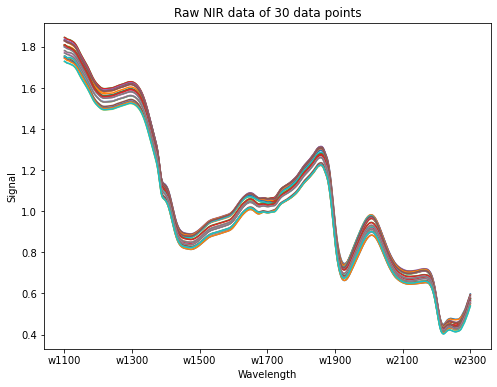

In [ ]:
sd_train_spectra.transpose().plot(legend=None,
                              figsize=(8,6),
                              title='Raw NIR data of 30 data points',
                              xlabel='Wavelength',
                              ylabel='Signal')

plt.savefig('Fig_1_A_Desai_Ashutosh.png')

###B.) Pre-process the NIR data and perform PCA for 5 components.

In [ ]:
sd_train_spectra.isnull().values.any()

False

In [ ]:
#Pre-process
#Standardize the data
scaler = StandardScaler()
sd_train_spectra_scaled = scaler.fit_transform(sd_train_spectra)
sd_train_spectra_scaled # To view the transformed data
sd_train_spectra_scaled.mean(axis=0) # To confirm that the mean of each of the 1201 variables X is 0

array([ 1.65053156e-15,  4.29286236e-16, -7.78636415e-15, ...,
       -1.60612264e-15,  6.19504448e-15,  4.66293670e-16])

In [ ]:
sd_train_spectra_scaled.mean(axis=0) # To confirm that the mean of each of the 1201 variables X is 0

array([ 1.65053156e-15,  4.29286236e-16, -7.78636415e-15, ...,
       -1.60612264e-15,  6.19504448e-15,  4.66293670e-16])

In [ ]:
sd_train_spectra_scaled.std(axis=0) # To confirm that the variance of each of the 1201 variables X is 1

array([1., 1., 1., ..., 1., 1., 1.])

In [ ]:
#Perform PCA for 5 components
pca = PCA(n_components=5, svd_solver='full')

###C.) Plot the cumulative explained variance versus the number of components. How many components do we need to capture 99% of the variance?

In [ ]:
#Plot the cumulative variance vs components
pca.fit(sd_train_spectra_scaled) #fitted the train data
pca.explained_variance_

array([1.11848943e+03, 9.22380195e+01, 2.50632674e+01, 5.62850897e+00,
       3.49539760e-01])

In [ ]:
pca.explained_variance_ratio_*100

array([9.00255162e+01, 7.42409816e+00, 2.01730434e+00, 4.53030142e-01,
       2.81339247e-02])

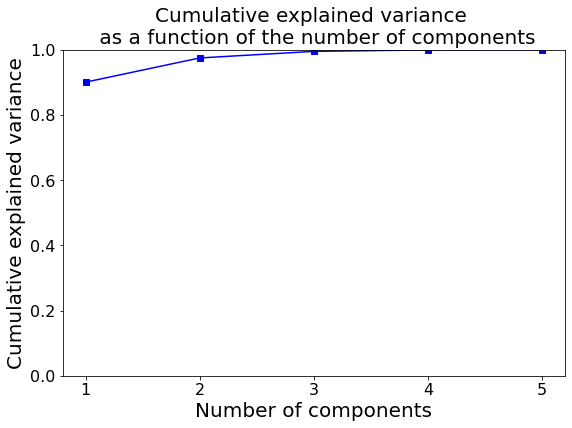

In [ ]:
fig = plt.figure(figsize=(9, 6))
sub0 = fig.add_subplot(111)
plt.plot(range(1,pca.n_components+1), np.cumsum(pca.explained_variance_ratio_),'b-s')
sub0.set_xlabel('Number of components', fontsize=20)
sub0.set_ylabel('Cumulative explained variance', fontsize=20)
sub0.set_title('Cumulative explained variance \n as a function of the number of components', fontsize=20)
sub0.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.tick_params(labelsize=16)
plt.ylim(0,1)


plt.savefig('Fig_1_C_Desai_Ashutosh.png')

We need **3** components to capture 99% of the variance

###D.) Plot the PCA scores for the first two components. Comment on any outliers, trends, clusters etc (if any).

In [ ]:
pca_scores = pca.transform(sd_train_spectra_scaled)
scores_pd = pd.DataFrame(data = pca_scores
                         ,columns = ['PC1', 'PC2','PC3','PC4','PC5']
                         ,index = sd_train_spectra.index)
scores_pd

,PC1,PC2,PC3,PC4,PC5
0,-42.268493,-4.040753,12.305789,-0.216578,0.168393
1,-36.354122,-4.346712,11.761122,-1.134579,-0.087849
2,-37.057664,-10.544641,-2.211747,0.989693,-0.906091
3,-37.052219,-10.376199,-1.876075,1.068672,-1.039932
4,-44.838660,-1.286436,3.611384,-1.353460,-0.279127
5,-41.555269,-0.534161,3.624322,-1.446707,-0.282848
6,-18.429982,12.203720,1.642649,4.719164,-0.115531
7,-20.471809,11.998962,2.013402,4.495532,-0.173509
8,3.330350,-9.772481,-1.652964,2.157331,0.000344
9,8.134331,-8.917490,-1.595358,2.224984,-0.013582


In [ ]:
def score_plot(scores, score_labels=None):
    # adjusting the scores to fit in (-1,1)
    xt = scores[:,0]
    yt = scores[:,1]
    scalext = 1.0/(xt.max() - xt.min())
    scaleyt = 1.0/(yt.max() - yt.min())
    xt_scaled = xt * scalext
    yt_scaled = yt * scaleyt
    
    fig = plt.figure(figsize=(9, 9))
    for (x,y), label in zip(np.vstack((xt_scaled, yt_scaled)).T, score_labels):
        plt.text(x, y, label, ha='center', size=11)
        
    plt.hlines(0, -1, 1, linestyles='solid', linewidth=3)
    plt.vlines(0, -1, 1, linestyles='solid', linewidth=3)
    
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1), fontsize=20);
    plt.ylabel("PC{}".format(2), fontsize=20);
    plt.tick_params(labelsize=16)
    plt.grid()

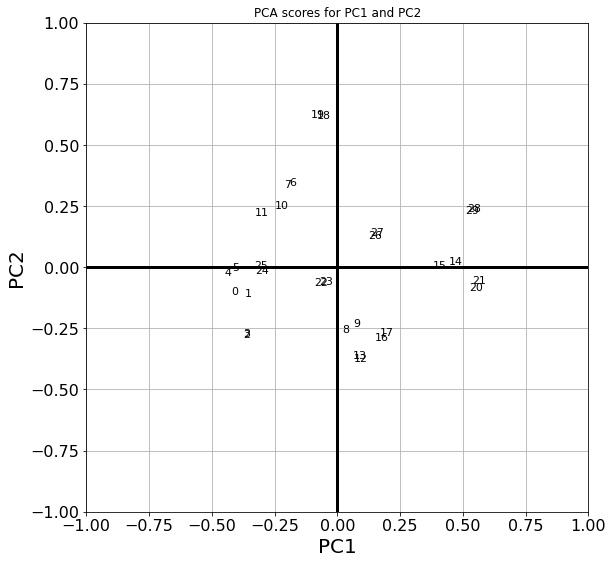

In [ ]:
score_plot(pca_scores[:,:2], score_labels=scores_pd.index)
plt.title('PCA scores for PC1 and PC2')


plt.savefig('Fig_1_D_Desai_Ashutosh.png')

The plot shown above shows scores of 30 datapoints for PC1 and PC2. We observe that points 18 and 19 are outliers i.e. they are far apart from probable clusters in the plot. 4 clusters are observed in the plot as well. For example, points, 4,5,0,1,25,24,2 and 3 fall under one cluster.

###E.) Plot the loadings of the first two components and comment on which wavelengths seem to be important for dierent PCs. Don't describe the graphs in words. In two sentences, describe any significant trends or signals (if any).

In [ ]:
loadings_pd = pd.DataFrame(data = pca.components_.T[:,:2]
                           ,columns = ['PC1', 'PC2']
                           ,index = sd_train_spectra.columns)
loadings_pd

,PC1,PC2
w1100,-0.025512,-0.056479
w1101,-0.025549,-0.056289
w1102,-0.025582,-0.056108
w1103,-0.025602,-0.055994
w1104,-0.025608,-0.055937
...,...,...
w2296,-0.028606,-0.019799
w2297,-0.028608,-0.019760
w2298,-0.028594,-0.019730
w2299,-0.028561,-0.019801


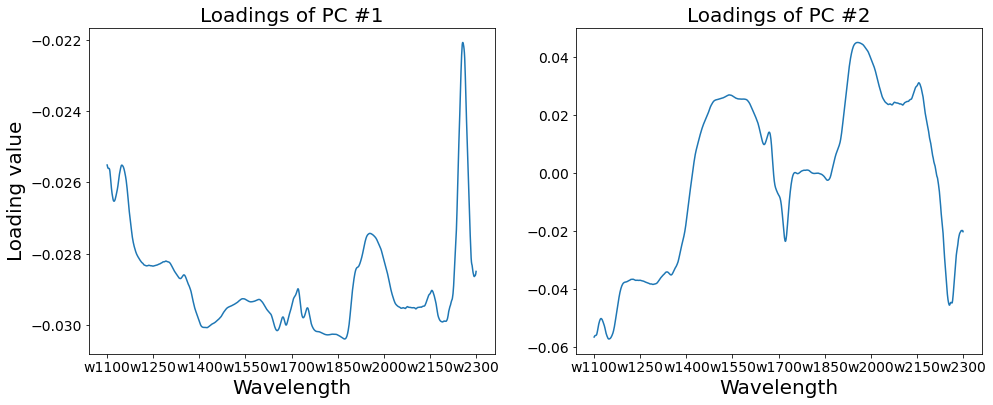

In [ ]:
fig0 = plt.figure(figsize=(16, 6))
sub1 = fig0.add_subplot(121)
plt.plot(loadings_pd['PC1'],'-')
sub1.set_xlabel('Wavelength', fontsize=20)
sub1.set_ylabel('Loading value', fontsize=20)
sub1.set_title('Loadings of PC #1', fontsize=20)
sub1.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.tick_params(labelsize=14)

sub2 = fig0.add_subplot(122)
plt.plot(loadings_pd['PC2'],'-')
sub2.set_xlabel('Wavelength', fontsize=20)
sub2.set_title('Loadings of PC #2', fontsize=20)
sub2.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.tick_params(labelsize=14)



plt.savefig('Fig_1_E_Desai_Ashutosh.png')

Loadings are basically contributions of every feature to make a principal component. A single principal component is a linear combination of all the features present. In the PC1 graph, a feature between w2150 and w2300 has a massive contribution in the formation of PC1 and a feature between w1850 and x2000 has the lowest contribution.

In the PC2 graph, a feature between w1850 and w2000 has a massive contribution in the formation of PC1 and a feature between w1100 and x1250 has the lowest contribution.

###F.) Apply the dimensionality reduction with the PCA model you developed in step B for the test set using the transform method.

In [ ]:
sd_test = pd.read_excel('sawdust_pred.xlsx')
sd_test

,Primary ID,OBSNAM,w1100,w1101,w1102,w1103,w1104,w1105,w1106,w1107,w1108,w1109,w1110,w1111,w1112,w1113,w1114,w1115,w1116,w1117,w1118,w1119,w1120,w1121,w1122,w1123,w1124,w1125,w1126,w1127,w1128,w1129,w1130,w1131,w1132,w1133,w1134,w1135,w1136,w1137,...,w2264,w2265,w2266,w2267,w2268,w2269,w2270,w2271,w2272,w2273,w2274,w2275,w2276,w2277,w2278,w2279,w2280,w2281,w2282,w2283,w2284,w2285,w2286,w2287,w2288,w2289,w2290,w2291,w2292,w2293,w2294,w2295,w2296,w2297,w2298,w2299,w2300,Spruce,Pine,Birch
0,3,27a,1.81358,1.81322,1.81260,1.81163,1.81039,1.80906,1.80790,1.80710,1.80665,1.80652,1.80662,1.80681,1.80697,1.80693,1.80669,1.80629,1.80563,1.80492,1.80410,1.80330,1.80250,1.80170,1.80084,1.79986,1.79869,1.79742,1.79598,1.79421,1.79222,1.79007,1.78779,1.78541,1.78296,1.78047,1.77786,1.77500,1.77197,1.76873,...,0.441450,0.442973,0.444594,0.446488,0.448491,0.450568,0.452553,0.454386,0.456326,0.458741,0.461666,0.465178,0.469017,0.473237,0.477520,0.481731,0.485742,0.489721,0.493781,0.498275,0.503130,0.508033,0.513017,0.518112,0.523386,0.528530,0.533506,0.538656,0.543831,0.549036,0.554158,0.559145,0.564020,0.569030,0.574032,0.578976,0.583663,10,10,80
1,4,27b,1.81596,1.81561,1.81501,1.81407,1.81282,1.81141,1.81011,1.80915,1.80864,1.80852,1.80868,1.80893,1.80922,1.80912,1.80875,1.80825,1.80760,1.80695,1.80628,1.80564,1.80501,1.80418,1.80332,1.80221,1.80090,1.79954,1.79810,1.79658,1.79490,1.79309,1.79112,1.78883,1.78637,1.78372,1.78086,1.77791,1.77480,1.77152,...,0.441587,0.442904,0.444219,0.445647,0.447135,0.448842,0.450809,0.453084,0.455733,0.458814,0.462180,0.465654,0.469008,0.472488,0.476237,0.480374,0.484904,0.489770,0.494809,0.500075,0.505326,0.510305,0.515156,0.519978,0.525036,0.529990,0.534792,0.539687,0.544487,0.549293,0.553986,0.558641,0.563356,0.568291,0.573301,0.578249,0.582786,10,10,80
2,7,25a,1.78716,1.78692,1.78634,1.78540,1.78391,1.78218,1.78059,1.77917,1.77823,1.77766,1.77740,1.77726,1.77695,1.77654,1.77590,1.77499,1.77400,1.77297,1.77194,1.77092,1.77000,1.76926,1.76855,1.76785,1.76699,1.76604,1.76487,1.76353,1.76203,1.76041,1.75871,1.75697,1.75517,1.75326,1.75119,1.74900,1.74657,1.74393,...,0.448265,0.449104,0.449923,0.450928,0.452090,0.453532,0.455205,0.457012,0.459003,0.461421,0.464125,0.467076,0.470049,0.473223,0.476549,0.480012,0.483498,0.487076,0.490776,0.494946,0.499580,0.504355,0.509354,0.514593,0.520145,0.525624,0.530797,0.535891,0.540838,0.545726,0.550425,0.554899,0.559244,0.563942,0.568828,0.573971,0.579059,80,10,10
3,8,25b,1.78042,1.77997,1.77926,1.77823,1.77693,1.77544,1.77406,1.77293,1.77212,1.77133,1.77072,1.77021,1.76978,1.76927,1.76868,1.76804,1.76730,1.76630,1.76526,1.76416,1.76309,1.76213,1.76121,1.76036,1.75954,1.75876,1.75787,1.75681,1.75546,1.75386,1.75205,1.75009,1.74806,1.74595,1.74373,1.74145,1.73904,1.73647,...,0.447329,0.448437,0.449560,0.450935,0.452469,0.454119,0.455776,0.457288,0.458684,0.460283,0.462095,0.464333,0.466935,0.470146,0.473897,0.477947,0.482013,0.486042,0.489911,0.493947,0.498102,0.502223,0.506492,0.510929,0.515726,0.520578,0.525330,0.530337,0.535487,0.540901,0.546347,0.551737,0.556951,0.562219,0.567279,0.572146,0.576698,80,10,10
4,13,17a,1.77133,1.77099,1.77031,1.76935,1.76811,1.76680,1.76563,1.76467,1.76401,1.76346,1.76300,1.76254,1.76198,1.76122,1.76027,1.75924,1.75822,1.75701,1.75583,1.75468,1.75374,1.75287,1.75210,1.75136,1.75054,1.74950,1.74833,1.74698,1.74549,1.74377,1.74202,1.74017,1.73823,1.73615,1.73392,1.73164,1.72924,1.72660,...,0.434951,0.435561,0.436016,0.436719,0.437679,0.438976,0.440772,0.442755,0.444955,0.447483,0.450069,0.452752,0.455347,0.458230,0.461507,0.465032,0.468595,0.472201,0.475707,0.479589,0.483791,0.487946,0.492442,0.497222,0.502528,0.507682,0.512486,0.517237,0.521950,0.526659,0.531376,0.535909,0.540315,0.544800,0.549163,0.553316,0.557163,25,50,25
5,14,17b,1.76519,1.76477,1.76401,1.76292,1.76143,1.75980,1.75824,1.75704,1.75625,1.75572,1.75540,1.75512,1.75473,1.75412,1.75322,1.75220,1.75115,1.75013,1.74920,1.74838,1.74767,1.74707,1.74640,1.74557,1.74447,1.74320,1

In [ ]:
sd_test_spectra = sd_test.iloc[:,2:1203]
sd_test_spectra

,w1100,w1101,w1102,w1103,w1104,w1105,w1106,w1107,w1108,w1109,w1110,w1111,w1112,w1113,w1114,w1115,w1116,w1117,w1118,w1119,w1120,w1121,w1122,w1123,w1124,w1125,w1126,w1127,w1128,w1129,w1130,w1131,w1132,w1133,w1134,w1135,w1136,w1137,w1138,w1139,...,w2261,w2262,w2263,w2264,w2265,w2266,w2267,w2268,w2269,w2270,w2271,w2272,w2273,w2274,w2275,w2276,w2277,w2278,w2279,w2280,w2281,w2282,w2283,w2284,w2285,w2286,w2287,w2288,w2289,w2290,w2291,w2292,w2293,w2294,w2295,w2296,w2297,w2298,w2299,w2300
0,1.81358,1.81322,1.81260,1.81163,1.81039,1.80906,1.80790,1.80710,1.80665,1.80652,1.80662,1.80681,1.80697,1.80693,1.80669,1.80629,1.80563,1.80492,1.80410,1.80330,1.80250,1.80170,1.80084,1.79986,1.79869,1.79742,1.79598,1.79421,1.79222,1.79007,1.78779,1.78541,1.78296,1.78047,1.77786,1.77500,1.77197,1.76873,1.76530,1.76175,...,0.438461,0.439190,0.440101,0.441450,0.442973,0.444594,0.446488,0.448491,0.450568,0.452553,0.454386,0.456326,0.458741,0.461666,0.465178,0.469017,0.473237,0.477520,0.481731,0.485742,0.489721,0.493781,0.498275,0.503130,0.508033,0.513017,0.518112,0.523386,0.528530,0.533506,0.538656,0.543831,0.549036,0.554158,0.559145,0.564020,0.569030,0.574032,0.578976,0.583663
1,1.81596,1.81561,1.81501,1.81407,1.81282,1.81141,1.81011,1.80915,1.80864,1.80852,1.80868,1.80893,1.80922,1.80912,1.80875,1.80825,1.80760,1.80695,1.80628,1.80564,1.80501,1.80418,1.80332,1.80221,1.80090,1.79954,1.79810,1.79658,1.79490,1.79309,1.79112,1.78883,1.78637,1.78372,1.78086,1.77791,1.77480,1.77152,1.76811,1.76454,...,0.438997,0.439561,0.440381,0.441587,0.442904,0.444219,0.445647,0.447135,0.448842,0.450809,0.453084,0.455733,0.458814,0.462180,0.465654,0.469008,0.472488,0.476237,0.480374,0.484904,0.489770,0.494809,0.500075,0.505326,0.510305,0.515156,0.519978,0.525036,0.529990,0.534792,0.539687,0.544487,0.549293,0.553986,0.558641,0.563356,0.568291,0.573301,0.578249,0.582786
2,1.78716,1.78692,1.78634,1.78540,1.78391,1.78218,1.78059,1.77917,1.77823,1.77766,1.77740,1.77726,1.77695,1.77654,1.77590,1.77499,1.77400,1.77297,1.77194,1.77092,1.77000,1.76926,1.76855,1.76785,1.76699,1.76604,1.76487,1.76353,1.76203,1.76041,1.75871,1.75697,1.75517,1.75326,1.75119,1.74900,1.74657,1.74393,1.74112,1.73812,...,0.446429,0.446895,0.447437,0.448265,0.449104,0.449923,0.450928,0.452090,0.453532,0.455205,0.457012,0.459003,0.461421,0.464125,0.467076,0.470049,0.473223,0.476549,0.480012,0.483498,0.487076,0.490776,0.494946,0.499580,0.504355,0.509354,0.514593,0.520145,0.525624,0.530797,0.535891,0.540838,0.545726,0.550425,0.554899,0.559244,0.563942,0.568828,0.573971,0.579059
3,1.78042,1.77997,1.77926,1.77823,1.77693,1.77544,1.77406,1.77293,1.77212,1.77133,1.77072,1.77021,1.76978,1.76927,1.76868,1.76804,1.76730,1.76630,1.76526,1.76416,1.76309,1.76213,1.76121,1.76036,1.75954,1.75876,1.75787,1.75681,1.75546,1.75386,1.75205,1.75009,1.74806,1.74595,1.74373,1.74145,1.73904,1.73647,1.73376,1.73090,...,0.445158,0.445660,0.446328,0.447329,0.448437,0.449560,0.450935,0.452469,0.454119,0.455776,0.457288,0.458684,0.460283,0.462095,0.464333,0.466935,0.470146,0.473897,0.477947,0.482013,0.486042,0.489911,0.493947,0.498102,0.502223,0.506492,0.510929,0.515726,0.520578,0.525330,0.530337,0.535487,0.540901,0.546347,0.551737,0.556951,0.562219,0.567279,0.572146,0.576698
4,1.77133,1.77099,1.77031,1.76935,1.76811,1.76680,1.76563,1.76467,1.76401,1.76346,1.76300,1.76254,1.76198,1.76122,1.76027,1.75924,1.75822,1.75701,1.75583,1.75468,1.75374,1.75287,1.75210,1.75136,1.75054,1.74950,1.74833,1.74698,1.74549,1.74377,1.74202,1.74017,1.73823,1.73615,1.73392,1.73164,1.72924,1.72660,1.72375,1.72061,...,0.433597,0.433874,0.434238,0.434951,0.435561,0.436016,0.436719,0.437679,0.438976,0.440772,0.442755,0.444955,0.447483,0.450069,0.452752,0.455347,0.458230,0.461507,0.465032,0.468595,0.472201,0.475707,0.479589,0.483791,0.487946,0.492442,0.497222,0.502528,0.507682,0.512486,0.517237,0.521950,0.526659,0.531376,0.535909,0.540315,0.544800,0.549163,0.553316,0.557163
5,1.76519,1.76477,1.76401,1.76292,1.76143,1.75980,1.75824,1.75704,1.75625,1.75572,1.7

In [ ]:
#Pre-process
#Standardize the data
#scaler = StandardScaler()
sd_test_spectra_scaled = scaler.transform(sd_test_spectra)
sd_test_spectra_scaled # To view the transformed data

array([[ 0.56106785,  0.56277143,  0.56489186, ...,  0.81097445,
         0.81684462,  0.83011673],
       [ 0.62880812,  0.63077748,  0.6334976 , ...,  0.76547342,
         0.7717667 ,  0.77634032],
       [-0.19090614, -0.1855797 , -0.18265447, ...,  0.48705192,
         0.50650761,  0.54780595],
       ...,
       [-1.7429554 , -1.73975988, -1.73354268, ..., -1.83144661,
        -1.83109582, -1.83435984],
       [-0.45617478, -0.45219757, -0.45081466, ..., -0.97576578,
        -0.96302027, -0.96467832],
       [-0.30276298, -0.31106367, -0.31331851, ..., -1.01080967,
        -1.00735413, -1.00570046]])

In [ ]:
sd_test_spectra_scaled.mean(axis=0) # To confirm that the mean of each of the 1201 variables X is 0

array([-0.63138396, -0.63054748, -0.63033538, ..., -0.5295709 ,
       -0.52663405, -0.52501128])

In [ ]:
sd_test_spectra_scaled.std(axis=0) # To confirm that the variance of each of the 1201 variables X is 1

array([0.71411207, 0.71406436, 0.71417663, ..., 0.84865052, 0.85400277,
       0.86048484])

In [ ]:
#Plot the PCA scores for the first two components.
#Perform PCA for 2 components

pca_scores1 = pca.transform(sd_test_spectra_scaled)
scores_pd1 = pd.DataFrame(data = pca_scores1[:,:2]
                         ,columns = ['PC1', 'PC2']
                         ,index = sd_test_spectra.index)
scores_pd1

,PC1,PC2
0,-27.618552,3.081252
1,-26.843671,1.913231
2,18.585434,-8.877615
3,23.818217,-7.586070
4,29.859483,-1.550916
5,33.643947,0.217732
6,-8.385014,-2.276177
7,-11.150608,-1.325693
8,22.998265,-2.487411
9,17.734735,-2.974622


###G.) Create a scatter plot of the scores in PC1, PC2 of all 54 points in the train and test data set, coloured by the set they belong to (suggestion: use sns.scatterplot). Why is it important to overlap the scores of both train and test set in one graph? What are you checking to see?

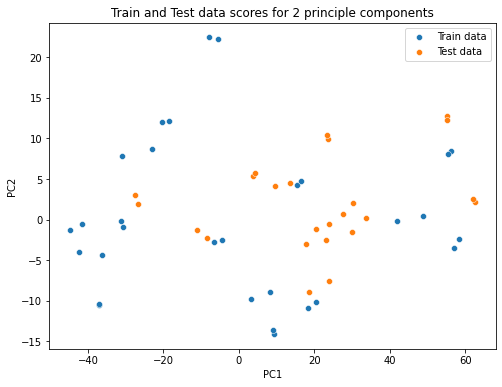

In [ ]:
fig = plt.figure(figsize=(8, 6))
sns.scatterplot(data=scores_pd, x=scores_pd["PC1"], y=scores_pd["PC2"],label='Train data')
sns.scatterplot(data=scores_pd1, x=scores_pd1["PC1"], y=scores_pd1["PC2"],label='Test data')
plt.title('Train and Test data scores for 2 principle components')
plt.legend()

plt.savefig('Fig_1_G_Desai_Ashutosh.png')

The plot shown above shows the scores of train and test data for PC1 and PC2. The scores are the projections of data points on a particular principal component axis. The collection of a set of datapoint scores on a plot (as shown above), represent the variance coverage of a datapoint on that axis. It is important that the test data shows a similar variance coverage as the trained data to illustrate model authentication, as the PCA model has been trained on the training data. The overlap plot of train and test data, visually shows that variance covered by both these datasets. Thus, it is important to overlap the scores of both train and test set in one graph.

In this case, the train and test data have NOT been split from an original dataset. These sets have been introduced separately into the problem. Thus, by plotting scores of both these datasets, we verify the data relativity as the variance coverage in the plot above is very similar.



##TASK - 2

###A.) Run the PLS regression to model all 3 outputs with the scaled train set spectra. Increase the number of components to achieve R2 value of at least 0.92 (use PLSRegression's method score to estimate R2).

In [ ]:
from sklearn.cross_decomposition import PLSRegression

In [ ]:
sd_train_spectra_y = sd_train.iloc[:,1203:]
sd_train_spectra_y

,Spruce,Pine,Birch
0,0.00,100.00,0.00
1,0.00,100.00,0.00
2,33.33,33.33,33.33
3,33.33,33.33,33.33
4,0.00,66.65,33.35
5,0.00,66.65,33.35
6,16.66,16.66,66.67
7,16.66,16.66,66.67
8,66.67,16.66,16.66
9,66.67,16.66,16.66


In [ ]:
comp = []
sc = []
for i in range(1,6):
  pls_sklearn = PLSRegression(n_components=i, scale=False)
  pls_sklearn.fit(sd_train_spectra_scaled, sd_train_spectra_y)
  r2_score1 = pls_sklearn.score(sd_train_spectra_scaled,sd_train_spectra_y)
  sc.append(r2_score1)
  comp.append(i)

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multi

In [ ]:
r2_score = pd.DataFrame(columns=['Number of Components','R2-Score'])
r2_score['Number of Components'] = comp
r2_score['R2-Score'] = sc
r2_score

,Number of Components,R2-Score
0,1,0.199394
1,2,0.496122
2,3,0.887339
3,4,0.977059
4,5,0.991648


We need 4 components to achieve R2 value of atleast 0.92

###B.) Predict the output values for the inputs in the test set and compare them by plotting the 24 actual vs predicted values in a 1x3 subplot (for spruce, pine and birch, respectively). Also, include the y=x line for reference.

In [ ]:
pls_sklearn = PLSRegression(n_components=4, scale=False)
pls_sklearn.fit(sd_train_spectra_scaled, sd_train_spectra_y)

PLSRegression(copy=True, max_iter=500, n_components=4, scale=False, tol=1e-06)

In [ ]:
y_test_predicted = pls_sklearn.predict(sd_test_spectra_scaled)
y_test_predicted[:,0]

array([26.18427874, 25.45633949, 89.01178132, 87.64423272, 41.79889137,
       40.06921756, 53.98678456, 53.16611629, 33.46890726, 30.69085727,
       46.51402665, 45.61312633, 48.30199161, 47.69011272, 28.81012352,
       27.50315005, 20.322547  , 19.73078102, 39.09323288, 37.85084576,
       55.78575581, 54.94104929, 22.76756939, 23.28823978])

In [ ]:
sd_test_spectra_y = np.array(sd_test.iloc[:,1203:])
sd_test_spectra_y[:,0]

array([10, 10, 80, 80, 25, 25, 50, 50, 10, 10, 40, 40, 50, 50, 25, 25, 10,
       10, 40, 40, 50, 50, 10, 10])

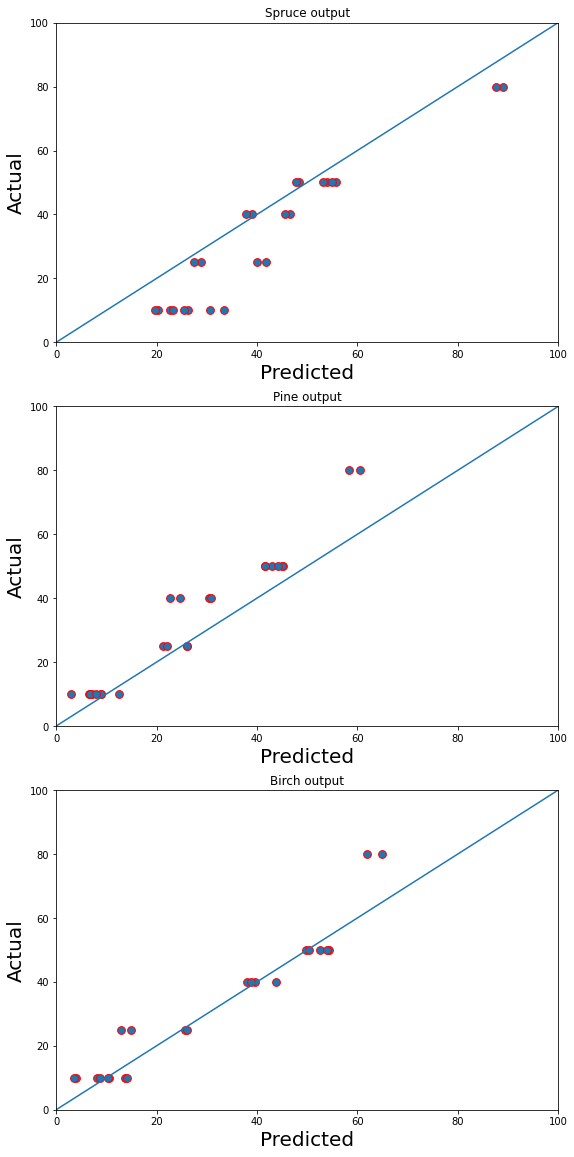

In [ ]:
fig2 = plt.figure(figsize=(9, 20))
plt.subplot(3, 1, 1)
plt.scatter(y_test_predicted[:,0], sd_test_spectra_y[:,0], s=60, marker="o", edgecolors='r')
plt.plot([0, 100], [0, 100])
plt.xlabel('Predicted', fontsize = 20)
plt.ylabel('Actual', fontsize = 20)
plt.title('Spruce output')
plt.xlim([0, 100])
plt.ylim([0, 100])

plt.subplot(3, 1, 2)
plt.scatter(y_test_predicted[:,1], sd_test_spectra_y[:,1], s=60, marker="o", edgecolors='r')
plt.plot([0, 100], [0, 100])
plt.xlabel('Predicted', fontsize = 20)
plt.ylabel('Actual', fontsize = 20)
plt.title('Pine output')
plt.xlim([0, 100])
plt.ylim([0, 100])

plt.subplot(3, 1, 3)
plt.scatter(y_test_predicted[:,2], sd_test_spectra_y[:,2], s=60, marker="o", edgecolors='r')
plt.plot([0, 100], [0, 100])
plt.xlabel('Predicted', fontsize = 20)
plt.ylabel('Actual', fontsize = 20)
plt.title('Birch output')
plt.xlim([0, 100])
plt.ylim([0, 100])

plt.savefig('Fig_2_B_Desai_Ashutosh.png')